# 주제 : 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까요? 직접 데이터로 분석하고 판단해 보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Video Game Sales with Ratings을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjinwang'
os.environ['KAGGLE_KEY'] = "275e30bb4ec266131f19681443d436b8"

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm '*.*'
!kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
!unzip '*.zip'


rm: cannot remove '*.*': No such file or directory
100% 476k/476k [00:00<00:00, 4.18MB/s]

Archive:  video-game-sales-with-ratings.zip
  inflating: Video_Games_Sales_as_at_22_Dec_2016.csv  


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거
df.dropna(inplace = True)
df.isna().sum()





Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [10]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


### 문제 5. 수치형 데이터의 히스토그램 확인하기


In [11]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

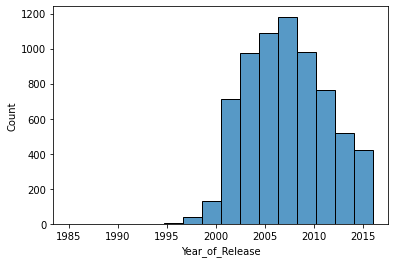

In [14]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인
sns.histplot(x='Year_of_Release',data=df, bins = 16)

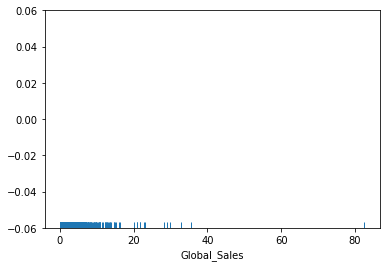

In [16]:
sns.rugplot(x='Global_Sales',data=df) # 엄청큰 숫자가 하나 보임

In [19]:
df[df['Global_Sales']>30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [20]:
gs = df['Global_Sales'].quantile(0.99)
print(gs)
df = df[df['Global_Sales']<gs]

7.167600000000002


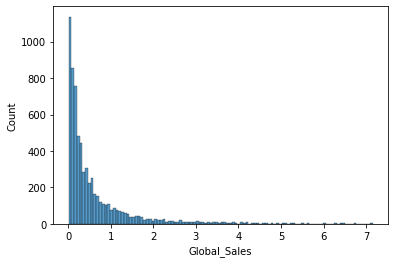

In [21]:
sns.histplot(x="Global_Sales", data = df)

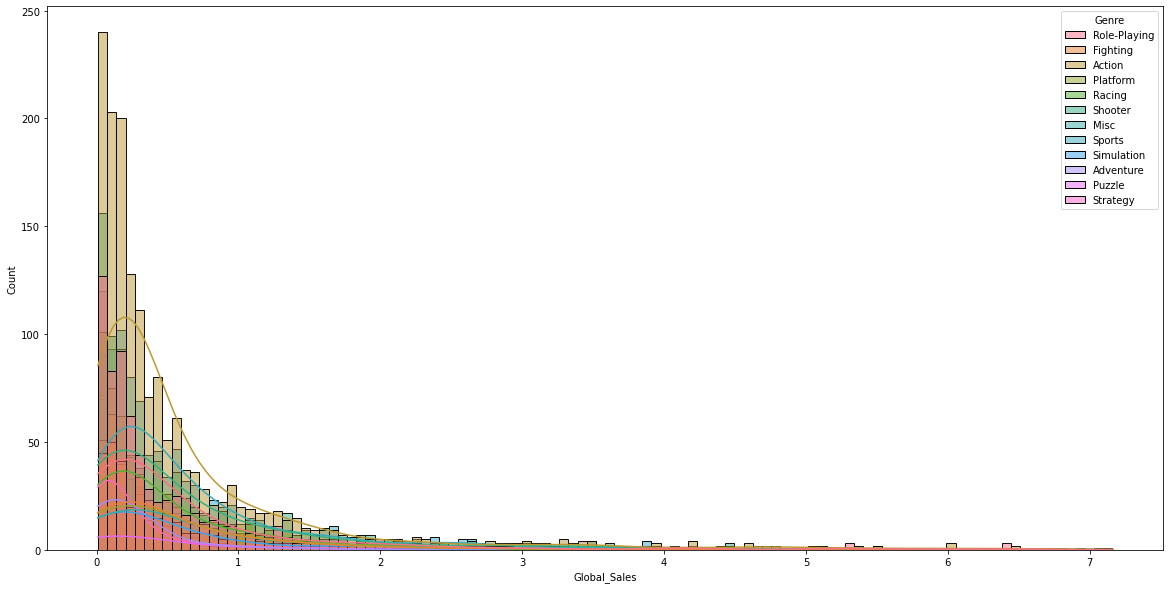

In [24]:
plt.figure(figsize = (20,10))
sns.histplot(x="Global_Sales", data = df, hue = "Genre", kde = True)
# 워낙 종류가 많아서 추후 범주형 데이터를 볼때 박스플랏으로 보면 좋을 것같다

In [25]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

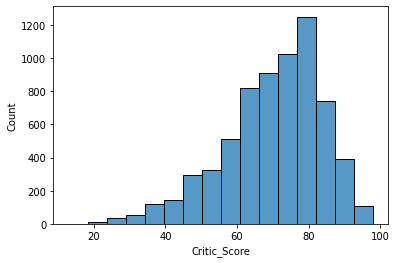

In [26]:
sns.histplot(x='Critic_Score',data = df, bins = 16) #높은 점수대에는 박하다

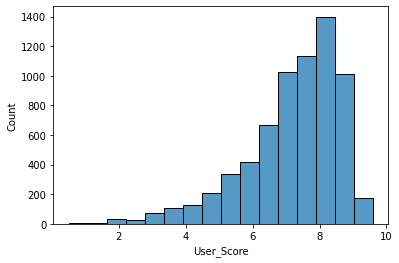

In [28]:
#sns.histplot(x='User_Score',data = df, bins = 16) #score가 숫자형로 되어있는거 같지가 않음

sns.histplot(data = df['User_Score'].apply(float), bins = 16) #문자열로 되어있는 숫자를 float으로 만들어서 본다
#critic 보단 높은쪽 점수에 후함

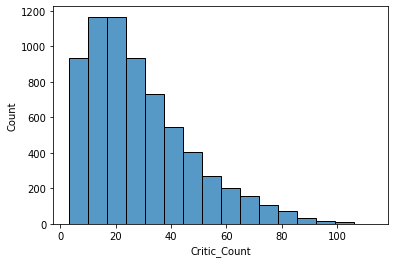

In [30]:
sns.histplot(x = 'Critic_Count',data = df,bins = 16)

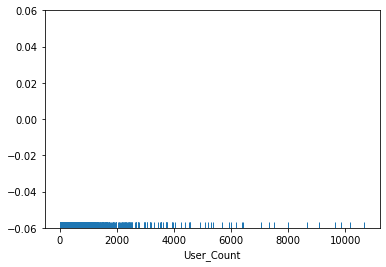

In [32]:
sns.rugplot(x = 'User_Count', data = df)

In [36]:
uc = df['User_Count'].quantile(0.99)

In [37]:
df = df[df['User_Count'] < uc]

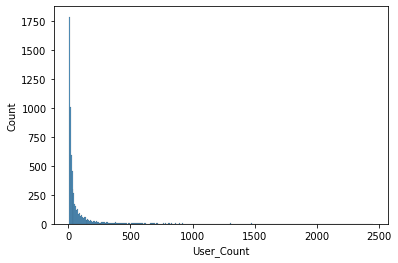

In [38]:
sns.histplot(x = 'User_Count', data = df)

In [40]:
uc = df['User_Count'].quantile(0.97)
print(uc)

911.5599999999977


In [42]:
df = df[df['User_Count'] < uc]

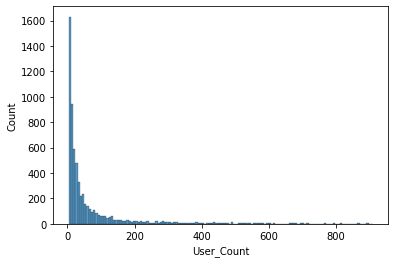

In [43]:
sns.histplot(x = 'User_Count', data = df)

### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

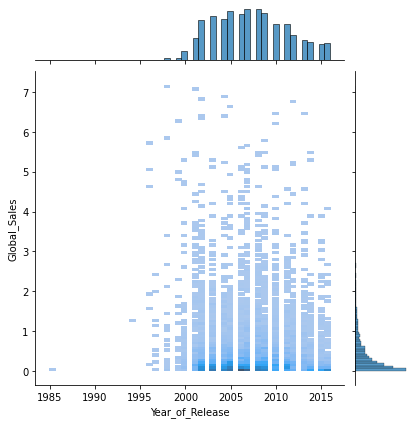

In [45]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석

sns.jointplot(x='Year_of_Release',y = 'Global_Sales',data = df, kind = 'hist') #값들이 떨어져있고 상관성이 그리 있어보이지 않음ㅠ





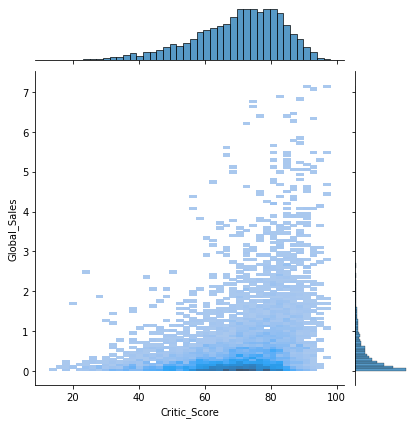

In [46]:
sns.jointplot(x='Critic_Score',y = 'Global_Sales',data = df, kind = 'hist') #상관성있음 -> 평이 좋을수록 많이 팔리는 편임
# 물론 전문가 평점이 높다고 무조건 판매가 높은건 아니지만 대체로 그렇다

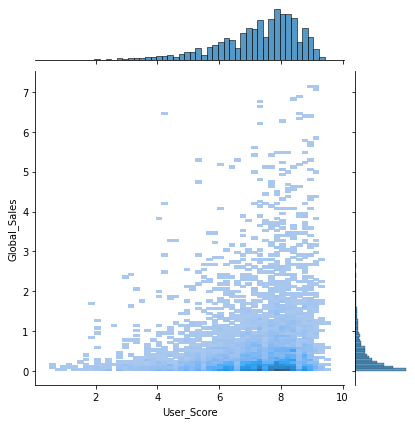

In [48]:
df['User_Score'] = df['User_Score'].apply(float)
sns.jointplot(x='User_Score',y = 'Global_Sales',data = df, kind = 'hist') #평론가 평점과 비슷한 양상이지만 조금 덜함

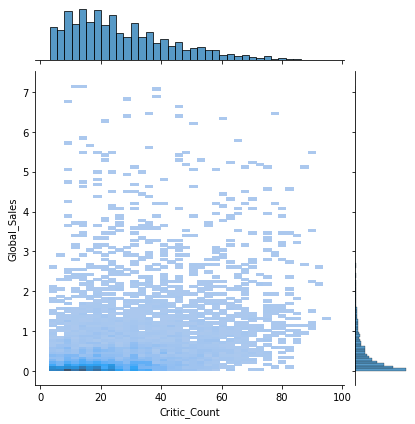

In [49]:
sns.jointplot(x='Critic_Count',y = 'Global_Sales',data = df, kind = 'hist') #평론가 숫자가 적을땐 판매량이 한쪽에 분포하지만
#평론가가 많이 붙은 것은 판매량이 고루 분포되어있다
#즉 평론가가 더 많이 평할수록 글로벌 세일이 더 높아보인다

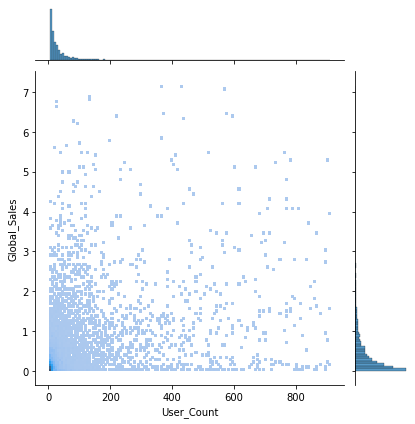

In [50]:
sns.jointplot(x='User_Count',y = 'Global_Sales',data = df, kind = 'hist') #판매량에 따라 평의 갯수가 천차만별임
# 보통의 게임들은 극소수의 유저에게만 평가를 받음. 

#평가 갯수는 서로 필요조건인것같다 -> 유저카운트와 유저스코어는 빼야할것같다 

### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

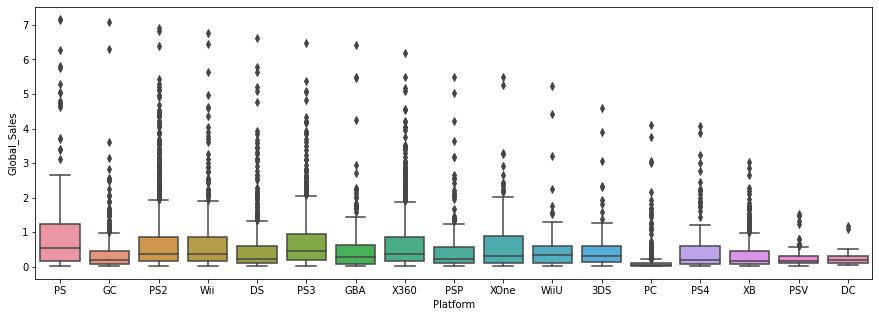

In [51]:
# 필요한 feature인지 꼭 확인해줘야한다
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Platform', y = 'Global_Sales',data = df)
#플스 시리즈가 좀 평균이 높은편
#wii도 잘 나감
#pc 게임은 많이 출시되어 평균이 좀 낮은것처럼 보임


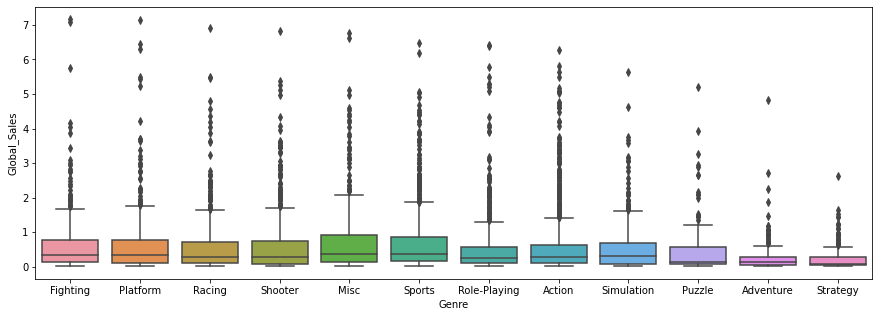

In [52]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Genre', y = 'Global_Sales',data = df)
#전략, 어드벤체는 좀 낮고, puzzle도 평균치가 굉장히 낮음
#스포츠,레이싱, 파이팅들이 좀 날나가는 장르

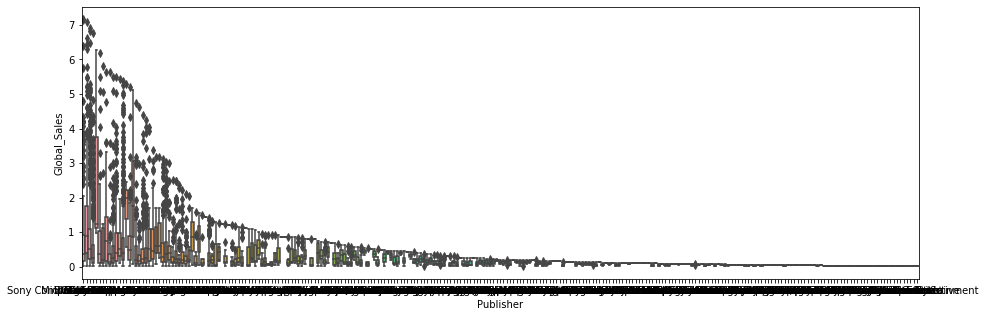

In [53]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Publisher', y = 'Global_Sales',data = df) #유통사 종류가 너무 많아 보기 힘듬 -> 서로 편차가 심한건 알수 있음
#(제작사랑 다른 개념임)

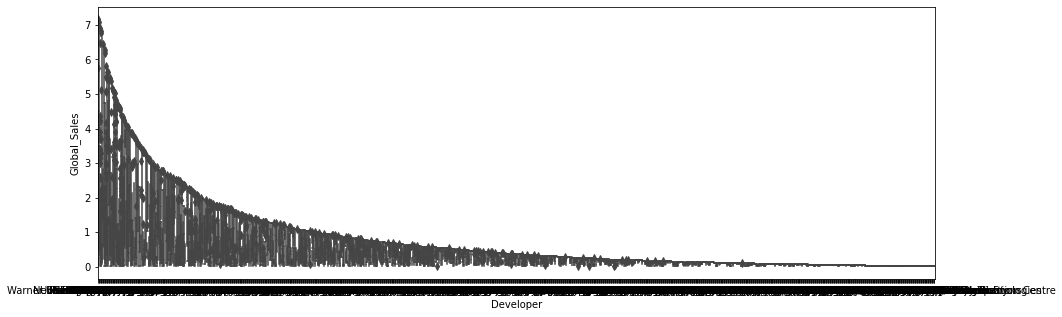

In [54]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Developer', y = 'Global_Sales',data = df) #publisher랑 마찬가지임 -> 소수 클래스로 묶어 작업하는게 필요할듯함

### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

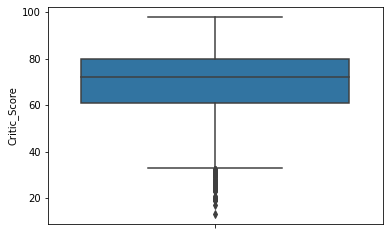

In [55]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계 비교/분석하기
# Hint) 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# Tip) 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리함

sns.boxplot(y = 'Critic_Score', data = df)



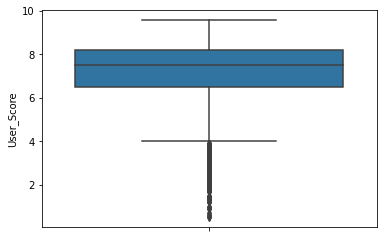

In [56]:
sns.boxplot(y = 'User_Score', data = df)

In [58]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score' : 'Score'}, axis = 1, inplace = True)
critic_score['ScoreBy'] = 'Critics'

In [59]:
critic_score

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,46.0,Critics
16677,81.0,Critics
16696,80.0,Critics
16700,61.0,Critics


In [63]:
user_score = df[['User_Score']].copy() *10
user_score.rename({'User_Score' : 'Score'}, axis = 1, inplace = True)
user_score['ScoreBy'] = 'Users'
user_score

,Score,ScoreBy
106,91.0,Users
109,89.0,Users
111,91.0,Users
113,86.0,Users
114,85.0,Users
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


In [64]:
scores = pd.concat([critic_score, user_score], axis = 0)
scores

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


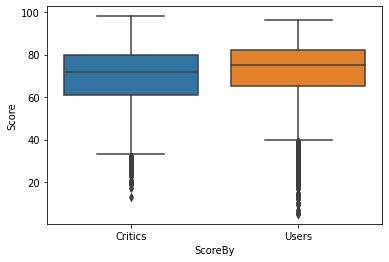

In [65]:
sns.boxplot(x='ScoreBy', y = 'Score', data = scores)

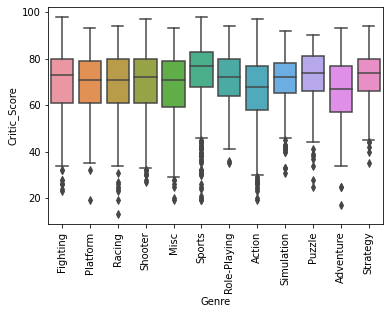

In [68]:
sns.boxplot(x='Genre', y = 'Critic_Score', data = df)
plt.xticks(rotation = 90)
plt.show()
#어드벤쳐는 평점이 짜다
#스포츠,격투가 좀 후하게 줌

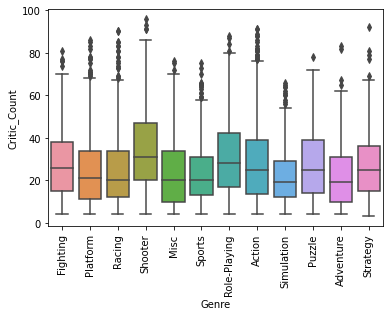

In [69]:
sns.boxplot(x='Genre', y = 'Critic_Count', data = df)
plt.xticks(rotation = 90)
plt.show()
#많으면 기대작일것 -> 총쏘는 게임이 높다, 스포츠는 낮다(기대치는 낮지만 돈은 잘벌리는듯)
#위에 비교하여 게임 특정장르에 대한 기대치와 실제 평가에 대한 비교를 할 수 있을것 같다

### 문제 9. 수치형 데이터간의 상관성 시각화하기

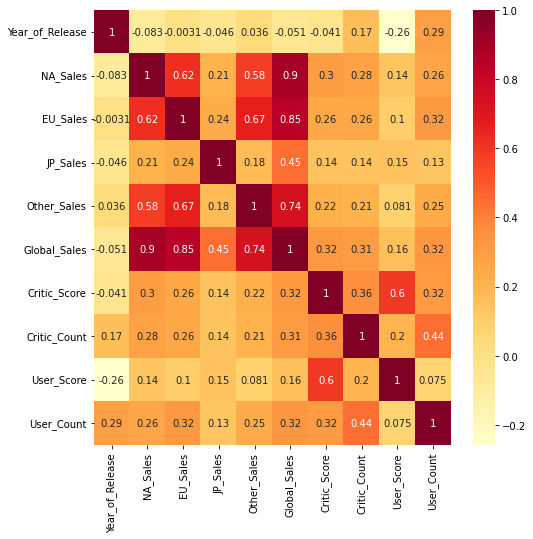

In [71]:
# Correlation Heatmap 시각화하기
fig = plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlOrRd')

#북미,유럽 판매가 전체 판매량 연관이 있다
#일본 판매는 전체판매와 상대적으로 덜 상관성이 있다
#전문가 평가횟수와 평가점수랑 판매량이 은근 상관성이있다
#유저 평가와 판매량은 그리 상관관계가 없다
#유저 평가횟수는 상관성이 높은데 아마 판매량과 필요조건이라 그런거 같다
#유저스코어와 전문가 스코어가 상관성이 높음 -> 판매량이 높다해서 유저의 만족도와 직접적인 연관이 있는것 같지는 않다


## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

In [ ]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인







### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [ ]:
X_cat = 





## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

scaler = 
X = 
y = 




In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 





### 문제 13. XGBoost 모델 생성/학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = 




### 문제 14. Linear Regression 모델 생성/학습하기

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression 모델 생성/학습
model_lr




### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = 
pred_lr = 






### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [ ]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

scaler = 
X = 
y = 




In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 





### 문제 19. XGBoost 모델 생성/학습하기

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = 




### 문제 20. Linear Regression 모델 생성/학습하기

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = 




### 문제 21. 모델 학습 결과 평가하기

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = 
pred_lr = 





### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 23. XGBoost 모델의 Feature Importance 시각화하기